In [ ]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 23.2 MB 1.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# function to display scores
def display_scores(y_true, predictions, model):
  print('Accuracy Score:', accuracy_score(y_true, predictions))
  print('Recall:', recall_score(y_true, predictions))
  print('Precision:', precision_score(y_true, predictions))
  print('f1(harmonic mean)-Score:', f1_score(y_true, predictions))

  # from_predictions is supported in 1.0
  RocCurveDisplay.from_predictions(y_true, predictions)
  plt.title(model + ' ROC Curve')
  plt.show()

  print("")
  ConfusionMatrixDisplay.from_predictions(y_true, predictions, colorbar=False)
  plt.show()

In [ ]:
# create toy dataset moons
X, y = make_moons(n_samples=5000, noise=0.3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [ ]:
print('Training features:',len(X_train))
print('Training labels:',len(y_train))
print('Testing features:',len(X_test))
print('Testing labels:',len(y_test))

Training features: 4000
Training labels: 4000
Testing features: 1000
Testing labels: 1000


At first some basic classifier will be build, afterwards ensembles will be created including XGBoost.

**Single Classifier**

1.   Logistic Regression
2.   SVM
3.   DecisionTree Classifier
4.   KNeighborsClassifier




**1 - Logistic Regression Classifier**

In [ ]:
# build classifier and evaluate
log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

Accuracy Score: 0.865
Recall: 0.8549618320610687
Precision: 0.883629191321499
f1(harmonic mean)-Score: 0.8690591658583898


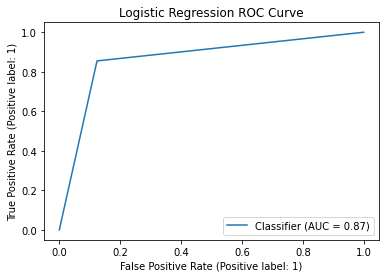

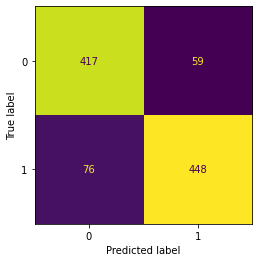

In [ ]:
display_scores(y_test, y_pred, 'Logistic Regression')

**2 - Support Vector Machine**

In [ ]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

Accuracy Score: 0.911
Recall: 0.9083969465648855
Precision: 0.9206963249516441
f1(harmonic mean)-Score: 0.914505283381364


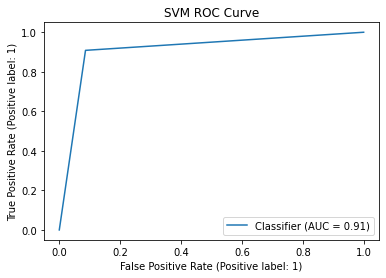

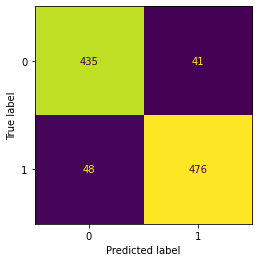

In [ ]:
display_scores(y_test, y_pred, 'SVM')

**3 - DecisionTree Classifier**

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

Accuracy Score: 0.879
Recall: 0.8854961832061069
Precision: 0.8838095238095238
f1(harmonic mean)-Score: 0.8846520495710201


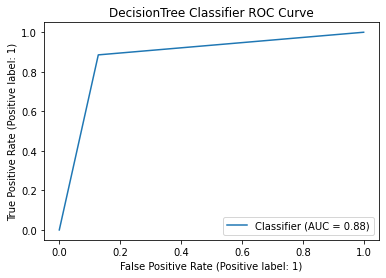

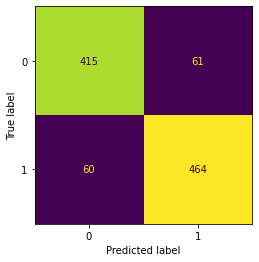

In [ ]:
display_scores(y_test, y_pred, 'DecisionTree Classifier')

**4 - KNeighborsClassifier**

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test) 

Accuracy Score: 0.906
Recall: 0.9007633587786259
Precision: 0.9182879377431906
f1(harmonic mean)-Score: 0.9094412331406552


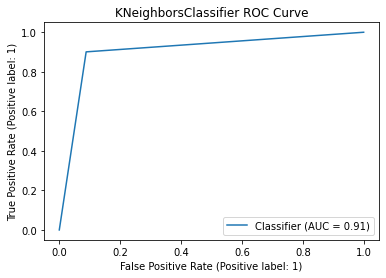

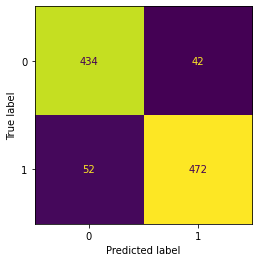

In [ ]:
display_scores(y_test, y_pred, 'KNeighborsClassifier')

**Ensembles**

1. RandomForestClassifier
2. VotingClassifier (Hard-Voting)
2. AdaBoost
3. XGBoost

**1 - RandomForestClassifier**

In [ ]:
rnd_clf = RandomForestClassifier(random_state=42) # n_estimators (default=100)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

Accuracy Score: 0.907
Recall: 0.9007633587786259
Precision: 0.9200779727095516
f1(harmonic mean)-Score: 0.910318225650916


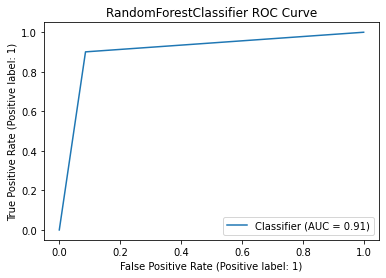

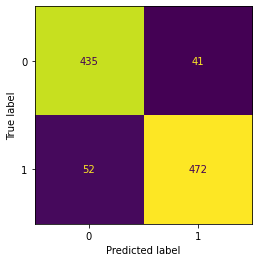

In [ ]:
display_scores(y_test, y_pred, 'RandomForestClassifier')

**2 - VotingClassifier with Hard-Voting**

In [ ]:
# create voting classifier with all classifiers so far
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svm_clf), ('tree', tree_clf), 
                ('kneigh', neigh), ('rf', rnd_clf)], voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('tree', DecisionTreeClassifier(random_state=42)),
                             ('kneigh', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=42))])

In [ ]:
for clf in (log_clf, svm_clf, tree_clf, neigh, rnd_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__,':',accuracy_score(y_test, y_pred))

LogisticRegression : 0.865
SVC : 0.911
DecisionTreeClassifier : 0.879
KNeighborsClassifier : 0.906
RandomForestClassifier : 0.907
VotingClassifier : 0.909


VotingClassifier slightly performs better than all the other ones except SVC :)


**3 - AdaBoost**

In [ ]:
'''If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. base_estimator 
must support calculation of class probabilities. If ‘SAMME’ then use the SAMME 
discrete boosting algorithm. The SAMME.R algorithm typically converges faster 
than SAMME, achieving a lower test error with fewer boosting iterations.'''
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=200, 
                             algorithm='SAMME.R', learning_rate=0.5, 
                             random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

Accuracy Score: 0.91
Recall: 0.9103053435114504
Precision: 0.9173076923076923
f1(harmonic mean)-Score: 0.9137931034482759


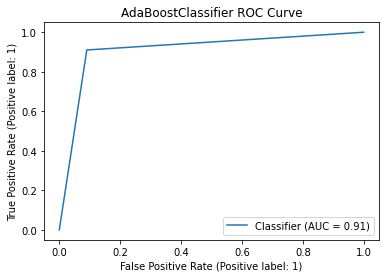

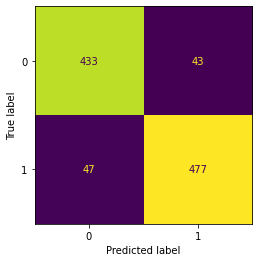

In [ ]:
display_scores(y_test, y_pred, 'AdaBoostClassifier')

**4 - XGBoost**

In [ ]:
import xgboost

In [ ]:
xgb = xgboost.XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

Accuracy Score: 0.914
Recall: 0.9141221374045801
Precision: 0.9211538461538461
f1(harmonic mean)-Score: 0.9176245210727969


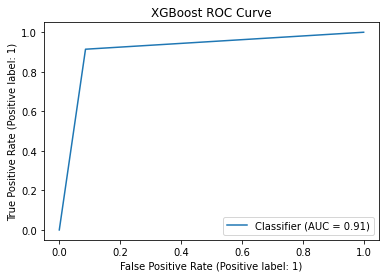

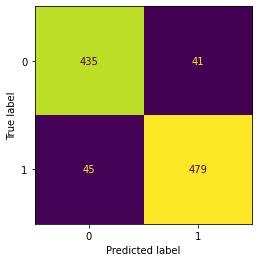

In [ ]:
display_scores(y_test, y_pred, 'XGBoost')

**Note:** XGBoost (vanilla) performs slightly better than all previous classifiers. 